# COMP47490 - Assignment 1
Name - Sagar Mahajan 

Student Number - 19204052

In [567]:
import json
from pathlib import Path
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
from collections import Counter
import re
import seaborn as sns
%matplotlib inline
!pip install matplotlib==3.1.


### TASK 1

#### Loading Data 

In [568]:
data = pd.read_csv("/Users/sagarmahajan/Desktop/Year4/Machine_Learning/pulsar_star_19204052.csv")



In [569]:
columns = [" Mean of the integrated profile"," Standard deviation of the integrated profile", " Excess kurtosis of the integrated profile", " Skewness of the integrated profile"," Mean of the DM-SNR curve", " Standard deviation of the DM-SNR curve", " Excess kurtosis of the DM-SNR curve", " Skewness of the DM-SNR curve"] 
all_col = [" Mean of the integrated profile"," Standard deviation of the integrated profile", " Excess kurtosis of the integrated profile", " Skewness of the integrated profile"," Mean of the DM-SNR curve", " Standard deviation of the DM-SNR curve", " Excess kurtosis of the DM-SNR curve", " Skewness of the DM-SNR curve", "target_class"] 
data


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,133.914062,53.718599,-0.045039,-0.246828,1.035117,9.819803,17.139964,389.481767,0.0
1,121.390625,43.511176,0.067653,0.031761,22.066054,53.055768,2.237581,3.702291,0.0
2,147.031250,52.769537,-0.729545,0.132651,3.098662,NaN,8.348595,69.943580,0.0
3,131.132812,46.648682,0.334587,0.566602,2.887124,21.377515,8.207284,71.573546,0.0
4,103.703125,51.305208,0.145222,-0.139590,5.329431,30.864552,6.217728,39.322612,0.0
...,...,...,...,...,...,...,...,...,...
9995,115.007812,49.018092,0.048708,-0.232284,1.327759,14.829565,12.223646,158.388837,0.0
9996,39.164062,33.532581,4.311137,22.854936,78.484114,72.270330,0.687211,-0.377126,1.0
9997,121.375000,52.455040,0.148123,-0.151496,5.013378,30.260101,6.321699,39.883783,0.0
9998,120.304688,55.298559,0.170645,-0.535797,11.470736,NaN,4.028343,14.302827,0.0


#### Missing values

In [570]:
for att in data:
    print("null values in", att,data[att].isna().sum())

null values in  Mean of the integrated profile 0
null values in  Standard deviation of the integrated profile 0
null values in  Excess kurtosis of the integrated profile 1393
null values in  Skewness of the integrated profile 0
null values in  Mean of the DM-SNR curve 0
null values in  Standard deviation of the DM-SNR curve 943
null values in  Excess kurtosis of the DM-SNR curve 0
null values in  Skewness of the DM-SNR curve 500
null values in target_class 0


above we can see there are 3 columns which have missing values. the column names are stored in a list made below. to deal with the missing values i will fill them using the median because when the data is skewed, it is good to consider using the median value for replacing the missing values rather than mean.

In [571]:
missing_col = [" Excess kurtosis of the integrated profile"," Standard deviation of the DM-SNR curve"," Skewness of the DM-SNR curve"] 


In [572]:
for att in missing_col:
    print("skewness of ", att,data[att].skew())

skewness of   Excess kurtosis of the integrated profile 3.6547921587900887
skewness of   Standard deviation of the DM-SNR curve 1.871299712301142
skewness of   Skewness of the DM-SNR curve 2.637689461624919


As we can see all the columns with missing values are highly skewed hence we will use the median.

In [573]:
for col in missing_col:
    data[col] = data[col].fillna(data[col].median())

In [574]:
for att in data:
    print("null values in", att,data[att].isna().sum())

null values in  Mean of the integrated profile 0
null values in  Standard deviation of the integrated profile 0
null values in  Excess kurtosis of the integrated profile 0
null values in  Skewness of the integrated profile 0
null values in  Mean of the DM-SNR curve 0
null values in  Standard deviation of the DM-SNR curve 0
null values in  Excess kurtosis of the DM-SNR curve 0
null values in  Skewness of the DM-SNR curve 0
null values in target_class 0


now we can see that there are no null values in the dataframe

#### check for unique values 

In [575]:
data.nunique()

 Mean of the integrated profile                   6314
 Standard deviation of the integrated profile     9989
 Excess kurtosis of the integrated profile        8607
 Skewness of the integrated profile              10000
 Mean of the DM-SNR curve                         6268
 Standard deviation of the DM-SNR curve           9056
 Excess kurtosis of the DM-SNR curve              9999
 Skewness of the DM-SNR curve                     9500
target_class                                         2
dtype: int64

In [576]:
data[data.duplicated()].shape[0]

0

this means there and no duplicate values in the dataset

#### outliers

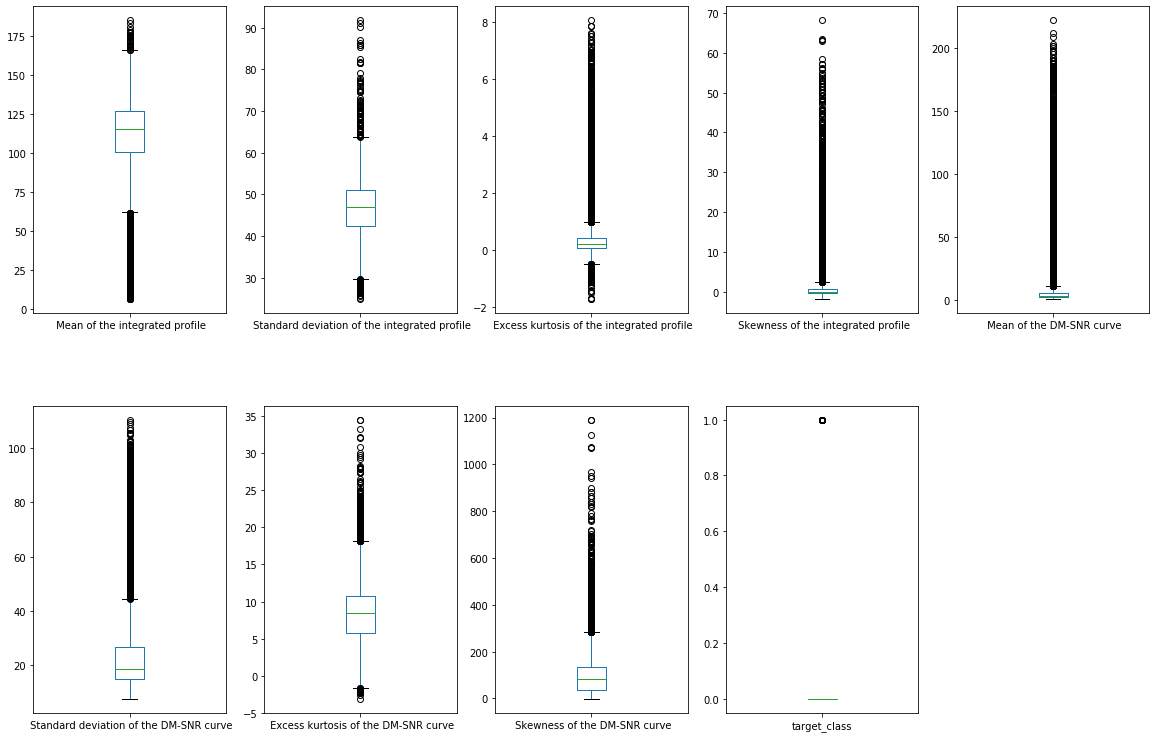

In [577]:
# data[' Excess kurtosis of the integrated profile'].plot(kind='box', subplots=True, figsize=(5,5));
fig = plt.figure(figsize=(20,13))
fontsize = 13
for i, n in enumerate(data):
    axc = fig.add_subplot(2, 5, i+1)
    p = data[n].plot(kind='box', subplots=True, figsize=fig);
    fig.subplots_adjust(hspace = 0.3)

Although there are many outliers in the datasets, I decided not to remove them as they can be essencial to the data. It is possible that pulsar starts are meant to have obscure values. 

## TASK 2

For this dataframe i have decided to use normalisation instead of standardization. 
Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors

In [578]:

target =data['target_class']
data =data.drop(columns=['target_class'])

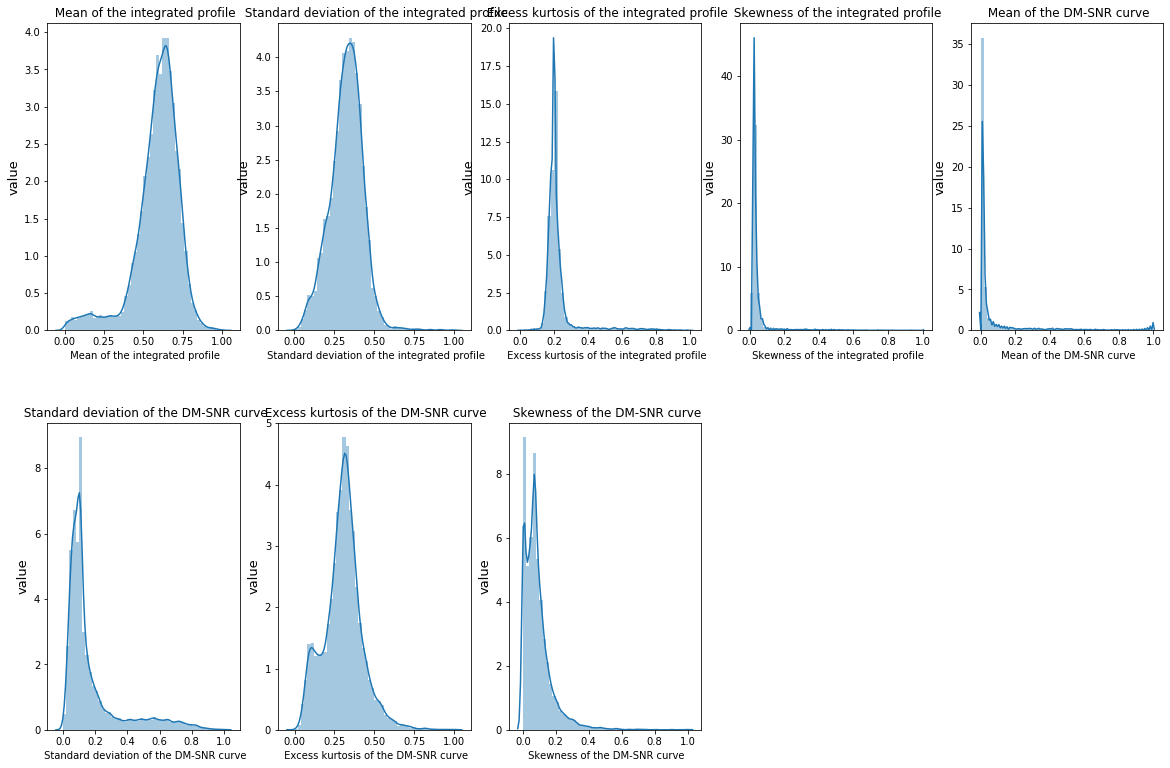

In [583]:
fig = plt.figure(figsize=(20,13))
fontsize = 13
for i, n in enumerate(data):
    axc = fig.add_subplot(2, 5, i+1)
    p = sns.distplot(data[n])
    fig.subplots_adjust(hspace = 0.3)
    p.set_title("%s" % n)
    p.set_ylabel("value",fontsize=13);

In [580]:
scaler =  MinMaxScaler(feature_range=(0, 1))
data = pd.DataFrame(scaler.fit_transform(data[columns].values), columns= columns)

as you can see all th evalues are now in vetween 0 and 1. This means th edataset is normalised.

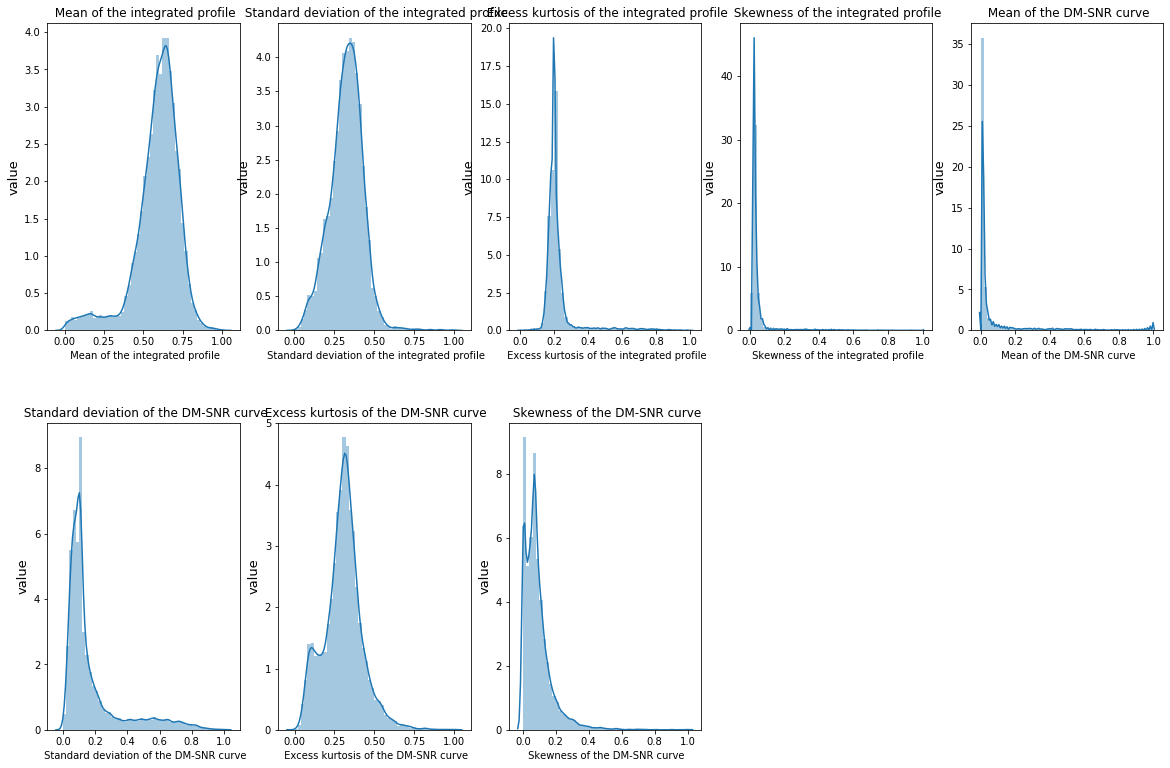

In [584]:
fig = plt.figure(figsize=(20,13))
fontsize = 13
for i, n in enumerate(data):
    axc = fig.add_subplot(2, 5, i+1)
    p = sns.distplot(data[n])
    fig.subplots_adjust(hspace = 0.3)
    p.set_title("%s" % n)
    p.set_ylabel("value",fontsize=13);

### Task 3

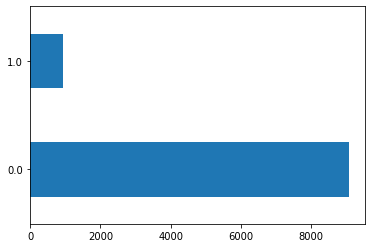

In [533]:
target.value_counts().plot(kind='barh')

Looking at the data, We know there is an imbalance. Therefore we cannot just look at the accuracy of the classifiers, rather we will use the presition, recall and F1 score as our evaluation measures.

## Task 4
#### K nearest neighbours

In [534]:

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.6, random_state=1)


In [478]:
knn_clf = KNeighborsClassifier() 
# fit the KNN model on the credit risk training data
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [479]:
# predict on the training dataset 
from sklearn.metrics import accuracy_score
y_predicted = knn_clf.predict(X_train)
accuracy_score(y_train, y_predicted)

0.9778333333333333

In [480]:
# predict if an individual's credit risk performance isgood or bad on the test data using the trained KNN model
y_predicted = knn_clf.predict(X_test)
accuracy_score(y_test, y_predicted)

0.975

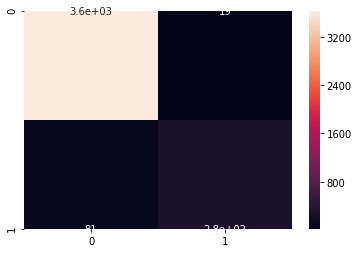

In [481]:
## ploting confusion matrix co-relation 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cfsion_matrix = confusion_matrix(y_test, y_predicted)
sns.heatmap(cfsion_matrix, annot=True)

In [482]:
print(classification_report(y_test, y_predicted))
print(np.round(accuracy_score(y_test, y_predicted)*100,2),'%')

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3641
         1.0       0.94      0.77      0.85       359

    accuracy                           0.97      4000
   macro avg       0.96      0.88      0.92      4000
weighted avg       0.97      0.97      0.97      4000

97.5 %


#### Decisiton tree

In [483]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
# fit the Decision Tree model on the athlete training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [484]:
# predict on the training dataset 
y_predicted = dtc.predict(X_train)
accuracy_score(y_train, y_predicted)

0.9748333333333333

In [485]:
# predict if an individual's credit risk performance isgood or bad on the test data using Decision Tree model
y_predicted = dtc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.976

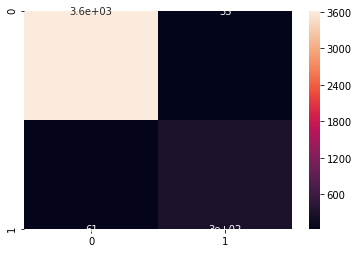

In [486]:
## ploting confusion matrix co-relation 
cfsion_matrix = confusion_matrix(y_test, y_predicted)
sns.heatmap(cfsion_matrix, annot=True)

In [487]:
print(classification_report(y_test, y_predicted))
print(np.round(accuracy_score(y_test, y_predicted)*100,2),'%')

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3641
         1.0       0.89      0.83      0.86       359

    accuracy                           0.98      4000
   macro avg       0.94      0.91      0.92      4000
weighted avg       0.98      0.98      0.98      4000

97.6 %


#### SVM

In [488]:
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_train, y_train)

SVC(kernel='linear')

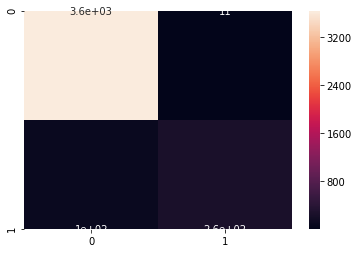

In [489]:
## ploting confusion matrix co-relation 
cfsion_matrix = confusion_matrix(y_test, svc_lin.predict(X_test))
sns.heatmap(cfsion_matrix, annot=True)

In [490]:
print(classification_report(y_test, svc_lin.predict(X_test)))
print(np.round(accuracy_score(y_test, svc_lin.predict(X_test))*100,2),'%')

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3641
         1.0       0.96      0.72      0.82       359

    accuracy                           0.97      4000
   macro avg       0.97      0.86      0.90      4000
weighted avg       0.97      0.97      0.97      4000

97.22 %


In [491]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

SVC()

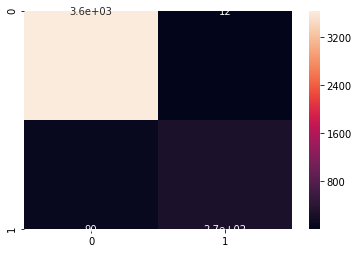

In [492]:
## ploting confusion matrix co-relation 
cfsion_matrix = confusion_matrix(y_test, svc_rbf.predict(X_test))
sns.heatmap(cfsion_matrix, annot=True)

In [493]:
print(classification_report(y_test, svc_rbf.predict(X_test)))
print(np.round(accuracy_score(y_test, svc_rbf.predict(X_test))*100,2),'%')

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3641
         1.0       0.96      0.75      0.84       359

    accuracy                           0.97      4000
   macro avg       0.97      0.87      0.91      4000
weighted avg       0.97      0.97      0.97      4000

97.45 %


In [494]:
svc_poly = SVC(kernel='poly', degree = 2) 
svc_poly.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

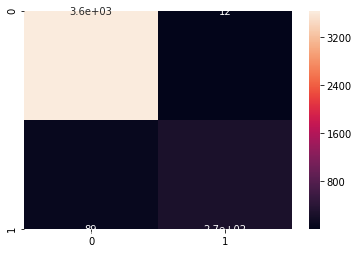

In [495]:
## ploting confusion matrix co-relation 
cfsion_matrix = confusion_matrix(y_test, svc_poly.predict(X_test))
sns.heatmap(cfsion_matrix, annot=True)

In [496]:
print(classification_report(y_test, svc_poly.predict(X_test)))
print(np.round(accuracy_score(y_test, svc_poly.predict(X_test))*100,2),'%')

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3641
         1.0       0.96      0.75      0.84       359

    accuracy                           0.97      4000
   macro avg       0.97      0.87      0.91      4000
weighted avg       0.97      0.97      0.97      4000

97.48 %


In [497]:
svc_sig = SVC(kernel='sigmoid')
svc_sig.fit(X_train, y_train)

SVC(kernel='sigmoid')

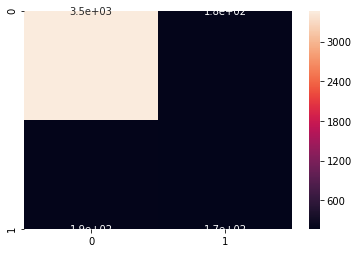

In [498]:
## ploting confusion matrix co-relation 
cfsion_matrix = confusion_matrix(y_test, svc_sig.predict(X_test))
sns.heatmap(cfsion_matrix, annot=True)

In [499]:
print(classification_report(y_test, svc_sig.predict(X_test)))
print(np.round(accuracy_score(y_test, svc_sig.predict(X_test))*100,2),'%')

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      3641
         1.0       0.48      0.47      0.47       359

    accuracy                           0.91      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.91      0.91      0.91      4000

90.6 %


Looking at all the accuracy scores, decision tree is the best classifier for this data. It has the highest accuracy score equal to 97.6%

### Task 5

below we calculate the information gain for each feature in the dataframe to decide the top 3 and the bottom 3. 

In [500]:
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
i_scores = mutual_info_classif(X_train, y_train)

# put the i_scores in a dataframe and sort
features_info_gain = pd.DataFrame(i_scores, index = X_train.columns, columns =['I-Gain'])
features_info_gain.sort_values(by=['I-Gain'], ascending=False, inplace=True)
features_info_gain

,I-Gain
Mean of the integrated profile,0.198980
Excess kurtosis of the integrated profile,0.196518
Skewness of the integrated profile,0.196005
Mean of the DM-SNR curve,0.118906
Standard deviation of the DM-SNR curve,0.117831
Excess kurtosis of the DM-SNR curve,0.113396
Skewness of the DM-SNR curve,0.112552
Standard deviation of the integrated profile,0.091706


In [501]:
top3_features= X_train[features_info_gain.index[:3]]
bottom3_features = X_train[features_info_gain.index[-3:]]

In [502]:
top3_features

,Mean of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile
5834,0.733946,0.161350,0.021901
2959,0.271583,0.486697,0.195409
2537,0.914145,0.200001,0.029532
166,0.557229,0.200001,0.023205
9083,0.573120,0.200122,0.023436
...,...,...,...
2895,0.717315,0.169316,0.030502
7813,0.482738,0.218041,0.036338
905,0.587705,0.200001,0.028927
5192,0.108581,0.631035,0.307176


In [503]:
bottom3_features

,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Standard deviation of the integrated profile
5834,0.298640,0.073166,0.446048
2959,0.109158,0.001650,0.183367
2537,0.256903,0.045790,0.330254
166,0.340435,0.071306,0.369626
9083,0.423007,0.145312,0.358725
...,...,...,...
2895,0.240981,0.031434,0.264863
7813,0.404804,0.129882,0.268470
905,0.392516,0.155858,0.337279
5192,0.114338,0.002449,0.214578


#### Top 3 Features SVM

In [536]:
X_train_val, X_test_val, Y_train_val, Y_test_val = train_test_split(top3_features, y_train, test_size=0.35, random_state=3)

lin_support_vector_classifier = SVC(kernel='linear', C=1E1).fit(X_train_val, Y_train_val)
print("linear SVC report : ")
print(classification_report(Y_test_val, lin_support_vector_classifier.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, lin_support_vector_classifier.predict(X_test_val))*100,2),'%')

rad_kernal = SVC(kernel='rbf', C=1E1).fit(X_train_val, Y_train_val)
print("RBF SVC  : ", rbf_score)
print(classification_report(Y_test_val, rad_kernal.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, rad_kernal.predict(X_test_val))*100,2),'%')

poly_kernel = SVC(kernel='poly', C=1E1, degree=2).fit(X_train_val, Y_train_val)
ploy_score = poly_kernel.score(X_test_val, Y_test_val)
print("poly SVC report (degree 2): ")
print(classification_report(Y_test_val, poly_kernel.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, poly_kernel.predict(X_test_val))*100,2),'%')
   
poly_kernel2 = SVC(kernel='poly', C=1E1, degree=5).fit(X_train_val, Y_train_val)
ploy_score2 = poly_kernel2.score(X_test_val, Y_test_val)
print("poly SVC report (degree 5): ", ploy_score2)
print(classification_report(Y_test_val, poly_kernel2.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, poly_kernel2.predict(X_test_val))*100,2),'%')

sig_kernel = SVC(kernel='sigmoid').fit(X_train_val, Y_train_val)
sig_score = sigmoid_kernel.score(X_train_val, Y_train_val)
print("sig SVM report: ")
print(classification_report(Y_test_val, sig_kernel.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, sig_kernel.predict(X_test_val))*100,2),'%')

linear SVC report : 
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1887
         1.0       0.98      0.66      0.79       213

    accuracy                           0.96      2100
   macro avg       0.97      0.83      0.88      2100
weighted avg       0.96      0.96      0.96      2100

96.38 %
RBF SVC  :  0.9685714285714285
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1887
         1.0       0.98      0.70      0.82       213

    accuracy                           0.97      2100
   macro avg       0.97      0.85      0.90      2100
weighted avg       0.97      0.97      0.97      2100

96.86 %
poly SVC report (degree 2): 
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1887
         1.0       0.98      0.65      0.78       213

    accuracy                           0.96      2100
   macro avg       0.97      0.

#### Bottom 3 Features SVM 

In [535]:
X_train_val, X_test_val, Y_train_val, Y_test_val = train_test_split(bottom3_features, y_train, test_size=0.35, random_state=3)

lin_support_vector_classifier = SVC(kernel='linear', C=1E1).fit(X_train_val, Y_train_val)
print("linear SVC report : ")
print(classification_report(Y_test_val, lin_support_vector_classifier.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, lin_support_vector_classifier.predict(X_test_val))*100,2),'%')

rad_kernal = SVC(kernel='rbf', C=1E1).fit(X_train_val, Y_train_val)
print("RBF SVC  : ", rbf_score)
print(classification_report(Y_test_val, rad_kernal.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, rad_kernal.predict(X_test_val))*100,2),'%')

poly_kernel = SVC(kernel='poly', C=1E1, degree=2).fit(X_train_val, Y_train_val)
ploy_score = poly_kernel.score(X_test_val, Y_test_val)
print("poly SVC report (degree 2): ")
print(classification_report(Y_test_val, poly_kernel.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, poly_kernel.predict(X_test_val))*100,2),'%')
   
poly_kernel2 = SVC(kernel='poly', C=1E1, degree=5).fit(X_train_val, Y_train_val)
ploy_score2 = poly_kernel2.score(X_test_val, Y_test_val)
print("poly SVC report (degree 5): ", ploy_score2)
print(classification_report(Y_test_val, poly_kernel2.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, poly_kernel2.predict(X_test_val))*100,2),'%')

sig_kernel = SVC(kernel='sigmoid').fit(X_train_val, Y_train_val)
sig_score = sigmoid_kernel.score(X_train_val, Y_train_val)
print("sig SVM report: ")
print(classification_report(Y_test_val, sig_kernel.predict(X_test_val)))
print(np.round(accuracy_score(Y_test_val, sig_kernel.predict(X_test_val))*100,2),'%')

linear SVC report : 
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1887
         1.0       0.90      0.51      0.65       213

    accuracy                           0.94      2100
   macro avg       0.92      0.75      0.81      2100
weighted avg       0.94      0.94      0.94      2100

94.48 %
RBF SVC  :  0.9685714285714285
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1887
         1.0       0.95      0.49      0.64       213

    accuracy                           0.95      2100
   macro avg       0.95      0.74      0.81      2100
weighted avg       0.95      0.95      0.94      2100

94.52 %
poly SVC report (degree 2): 
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1887
         1.0       0.89      0.56      0.69       213

    accuracy                           0.95      2100
   macro avg       0.92      0.

/Users/sagarmahajan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  Excess kurtosis of the DM-SNR curve
-  Skewness of the DM-SNR curve
-  Standard deviation of the integrated profile
Feature names seen at fit time, yet now missing:
-  Excess kurtosis of the integrated profile
-  Mean of the integrated profile
-  Skewness of the integrated profile

  warnings.warn(message, FutureWarning)


sig SVM report: 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1887
         1.0       0.01      0.01      0.01       213

    accuracy                           0.81      2100
   macro avg       0.45      0.46      0.45      2100
weighted avg       0.80      0.81      0.81      2100

81.29 %


Looking at the SVC and their evaluations, there is a big difference between the F1 scores and accuracy percentages. Overall accuracy score percentages of top 3 features are higher. 

### Task 6

In wrapper methods, we try to use a subset of features and train a model using them. We will be using sequential Feature Selector as the wrapping technique.

In [507]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [508]:
def sfsplot(clf):
    sfs_forward = SFS(clf, 
                  k_features=3, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

    # try the sfs_forward model on the 
    sfs_forward = sfs_forward.fit(X_train, y_train)
    fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

    plt.ylim([0.75, 1])
    plt.title('Sequential Forward Selection (w. StdDev) - %s'% clf)
    plt.grid()
    plt.show()
    print(sfs_forward.k_feature_names_)

### KNN

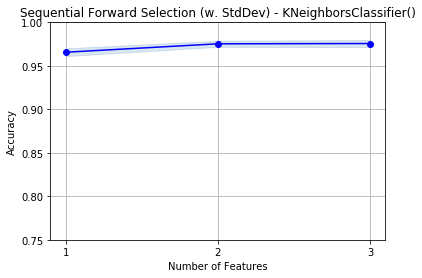

(' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile')


In [509]:
sfsplot(knn_clf)


### Decision Tree

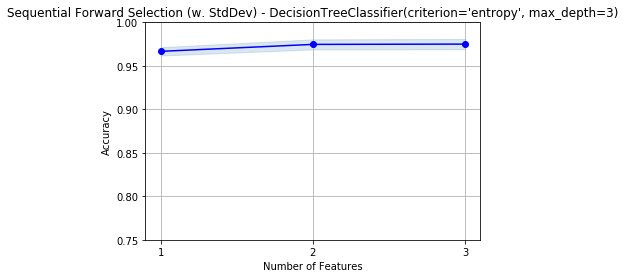

(' Mean of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile')


In [510]:
sfsplot(dtc)

### SVM
#### linear

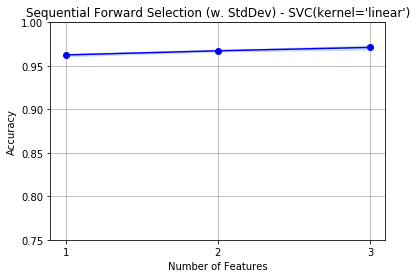

(' Mean of the integrated profile', ' Excess kurtosis of the integrated profile', ' Excess kurtosis of the DM-SNR curve')


In [511]:
sfsplot(svc_lin)

#### rbf

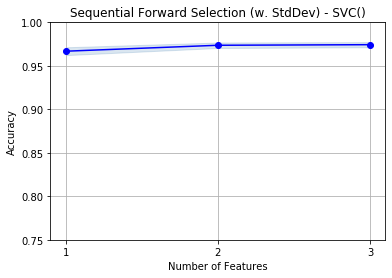

(' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Skewness of the DM-SNR curve')


In [512]:
sfsplot(svc_rbf)

#### poly

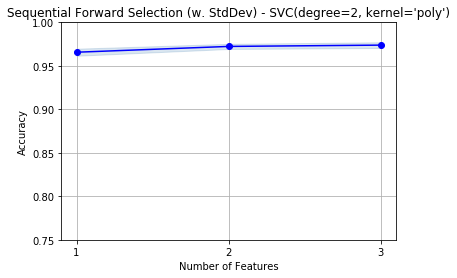

(' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile')


In [513]:
sfsplot(svc_poly)

#### sigmoid

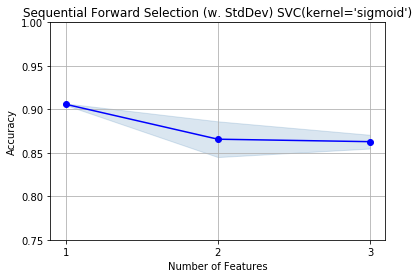

(' Standard deviation of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve')


In [300]:
sfsplot(svc_sig)

## TASK 7

looking at the feature selections done in task 4 using the information gain and the forward selection technique in task 6, we clearly say a change in the overall accuracy of the classifiers. The percentage values we got in task 4 averaged around 97% however when we chose only the top 3 features it dropped in task5 to 96%. This shows having all the features in the dataset is better.

## TASK 8 

In [545]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.6, random_state=1)

#### K nearest neighbours

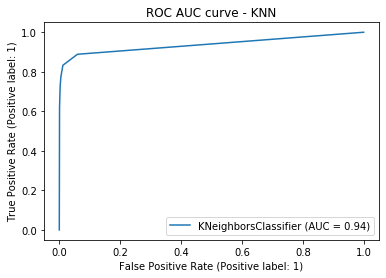

In [556]:
disp = RocCurveDisplay.from_estimator(knn_clf, X_test, y_test, pos_label=1)
disp.ax_.set_title("ROC AUC curve - KNN");

#### Decision Tree

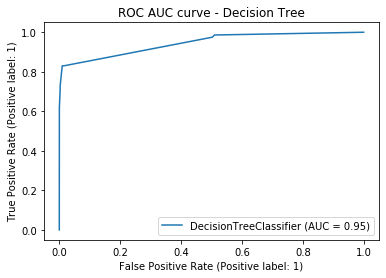

In [557]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test, pos_label=1)
disp.ax_.set_title("ROC AUC curve - Decision Tree");

#### SVC linear

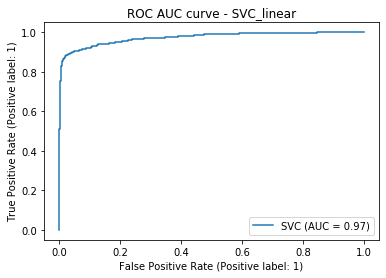

In [558]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(svc_lin, X_test, y_test, pos_label=1)
disp.ax_.set_title("ROC AUC curve - SVC_linear");

#### SVC RBF

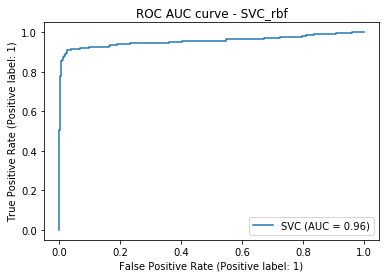

In [559]:
disp = RocCurveDisplay.from_estimator(svc_rbf, X_test, y_test, pos_label=1)
disp.ax_.set_title("ROC AUC curve - SVC_rbf");

#### SVC poly

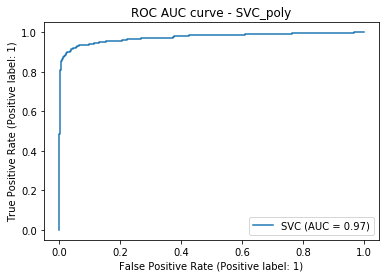

In [560]:
disp = RocCurveDisplay.from_estimator(svc_poly, X_test, y_test, pos_label=1)
disp.ax_.set_title("ROC AUC curve - SVC_poly");

#### SVC sigmoid

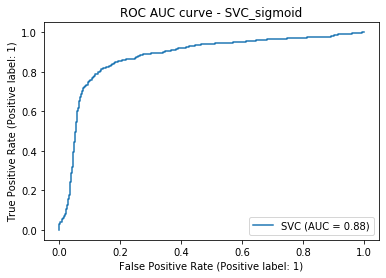

In [561]:
disp = RocCurveDisplay.from_estimator(svc_sig, X_test, y_test, pos_label=1)
disp.ax_.set_title("ROC AUC curve - SVC_sigmoid");

according to the ROC graphs above, we can say that SVC linear and SVC poly are the best performing models for this dataset as the AUC values are th  highest for them ( which is equal to 0.97)